This notebook details first steps taken to create a timeseries of areal extent of farm dams by state to estimate carbon emissions from flooded lands for inclusion in the 20_18 NIR. Geometry of known water bodies was sourced from the geofabric dataset supplied by BOM (http://www.bom.gov.au/water/geofabric/download.shtml) and the timeseries of wet pixels was supplied by GA (https://data.dea.ga.gov.au/?prefix=projects/WaterBodies/). An intersection of the two layers was performed to identify relevant FID's which were used to find the corresponding csv files to process using 02 process_csv.ipynb.

In [5]:
# import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import pickle

In [6]:
# set filepaths
fp_fds = 'FarmDamArea.shp'
fp_wbs = r'P:/projects/SpecialistProjects/farmdams/dea-public-data/WaterBodies/water_bodies_esri/water_bodies.shp'
fp_sts = r'P:/lib/context/states.shp'

In [7]:
# read files
farm_dams = gpd.read_file(fp_fds)
water_bodies = gpd.read_file(fp_wbs)
states = gpd.read_file(fp_sts)

In [8]:
# check geometry - if false, reproject one layer to match the other
print(farm_dams.crs == water_bodies.crs)
print(farm_dams.crs == states.crs)

False
True


In [15]:
# sometimes the projection is not imported so set projection if known
# farm_dams.crs = {'init' :'epsg:4283'}
# states.crs = {'init' :'epsg:4283'}

In [9]:
# make a copy of dataset and convert crs where required
water_bodies_epsg4283 = water_bodies.copy()
water_bodies_epsg4283 = water_bodies_epsg4283.to_crs({'init' :'epsg:4283'})

# delete dataframes that are no longer required
del water_bodies

C:\Program Files\ArcGIS\Pro\bin\Python\envs\jlab-test\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [11]:
# list columns to keep & subset dataframes
wb_cols = ['FID', 'geometry']
fds_cols = ['OBJECTID', 'NAME', 'geometry']
sts_cols = ['STATE_CODE', 'geometry']

water_bodies_epsg4283 = water_bodies_epsg4283[wb_cols]
farm_dams = farm_dams[fds_cols]
states = states[sts_cols]

In [12]:
farm_dams.head()

,OBJECTID,NAME,geometry
0,10740,None,"POLYGON ((141.99156 -35.91089, 141.99130 -35.9..."
1,10741,None,"POLYGON ((151.16465 -32.47216, 151.16415 -32.4..."
2,10744,None,"POLYGON ((153.00551 -29.47765, 153.00572 -29.4..."
3,10745,None,"POLYGON ((149.58785 -34.56341, 149.58747 -34.5..."
4,10746,None,"POLYGON ((147.66188 -31.22212, 147.66158 -31.2..."


State codes defined in the feature layer 'P:/lib/context/states.shp' are listed below:

ACT = 1 & 2;
NSW = 3;
NT = 4;
QLD = 5;
SA = 6;
TAS = 7;
VIC = 8;
WA = 9

In [34]:
# find dams by state to reduce processing times
dfObj[(dfObj['Sale'] > 30) & (dfObj['Sale'] < 33) ]
# dams_act = gpd.overlay(farm_dams, states.[(states['STATE_CODE'] == 1) & (states['STATE_CODE'] == 2)], how='intersection')
# dams_nsw = gpd.overlay(farm_dams, states.loc[states['STATE_CODE'] == 3], how='intersection')
# dams_nt = gpd.overlay(farm_dams, states.loc[states['STATE_CODE'] == 4], how='intersection')
dams_qld = gpd.overlay(farm_dams, states.loc[states['STATE_CODE'] == 5], how='intersection')
# dams_sa = gpd.overlay(farm_dams, states.loc[states['STATE_CODE'] == 6], how='intersection')
# dams_tas = gpd.overlay(farm_dams, states.loc[states['STATE_CODE'] == 7], how='intersection')
# dams_vic = gpd.overlay(farm_dams, states.loc[states['STATE_CODE'] == 8], how='intersection')
# dams_wa = gpd.overlay(farm_dams, states.loc[states['STATE_CODE'] == 9], how='intersection')

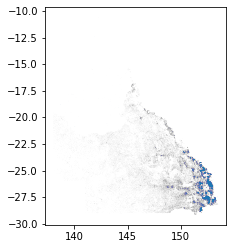

In [36]:
dams_qld.plot()

In [46]:
# find corresponding DEA water bodies
# intersect_act = gpd.overlay(dams_act, water_bodies_epsg4283, how='intersection')
# intersect_nsw = gpd.overlay(dams_nsw, water_bodies_epsg4283, how='intersection')
# intersect_nt = gpd.overlay(dams_nt, water_bodies_epsg4283, how='intersection')
intersect_qld = gpd.overlay(dams_qld, water_bodies_epsg4283, how='intersection')
# intersect_sa = gpd.overlay(dams_sa, water_bodies_epsg4283, how='intersection')
# intersect_tas = gpd.overlay(dams_tas, water_bodies_epsg4283, how='intersection')
# intersect_vic = gpd.overlay(dams_vic, water_bodies_epsg4283, how='intersection')
# intersect_wa = gpd.overlay(dams_wa, water_bodies_epsg4283, how='intersection')

In [47]:
len(intersect_qld)

30139

In [48]:
# save output to pickle to avoid re-creating dataset each time
with open('P:/projects/SpecialistProjects/farmdams/geo_results/intersect_qld.pickle', 'wb') as handle:
        pickle.dump(intersect_qld, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [49]:
# load pickle
intersect_qld = pickle.load(open('P:/projects/SpecialistProjects/farmdams/geo_results/intersect_qld.pickle', 'rb'))

In [50]:
# save dams and water bodies intersection to shapefile
intersect_qld.to_file('P:/projects/SpecialistProjects/farmdams/geo_results/intersect_qld.shp')
dams_qld.to_file('P:/projects/SpecialistProjects/farmdams/geo_results/dams_qld.shp')